In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from sklearn import linear_model

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (10,10)
legend_fontsize = 16

# Линейная регрессия

## Оверфиттинг

[ 1.28261927 -0.01099937 -0.4347314 ]
[   3.99834604   12.33797715  -31.83588673  -51.49677188  121.07585157
   29.13041461 -126.83659109   23.62719719   35.10368272  -12.21132872]


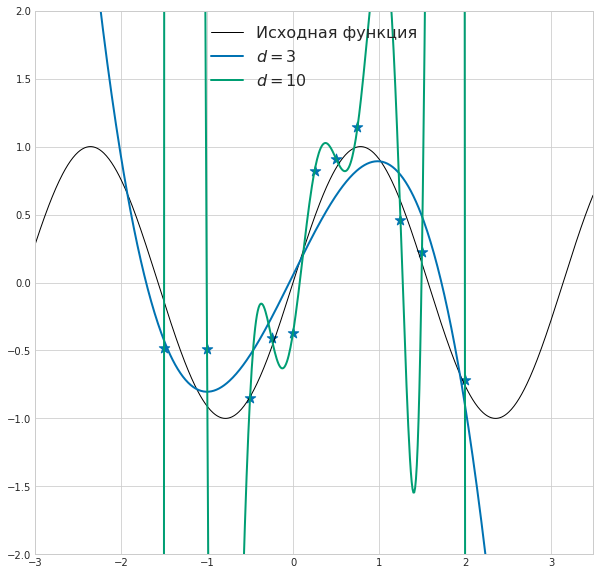

In [7]:
## Исходная функция
orig = lambda x : np.sin(2*x)

## X-координаты точек данных
xd = np.array([-3, -2, -1, -0.5, 0, 0.5, 1, 1.5, 2.5, 3, 4]) / 2
num_points = len(xd)

## Данные
data = orig(xd) + np.random.normal(0, .25, num_points)

## Для 
xs = np.arange(xd[0]-1.5, xd[-1]+1.5, 0.01)

## Выделение полиномиальных признаков
xs_d = np.vstack([xs ** i for i in range(1, num_points+1)]).transpose()
xd_d = np.vstack([xd ** i for i in range(1, num_points+1)]).transpose()

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-2, 2))
ax.scatter(xd, data, marker='*', s=120)
ax.plot(xs, orig(xs), linewidth=1, label="Исходная функция", color="black")

set_of_powers = [ 3,  10 ]

for d in set_of_powers:
    cur_model = linear_model.LinearRegression(fit_intercept=True).fit( xd_d[:, :d], data )
    print(cur_model.coef_)
    ax.plot(xs, cur_model.predict( xs_d[:, :d] ), linewidth=2, label="$d=%d$" % d)

ax.legend(loc="upper center", fontsize=legend_fontsize)

plt.show()

## Добавим ещё данных

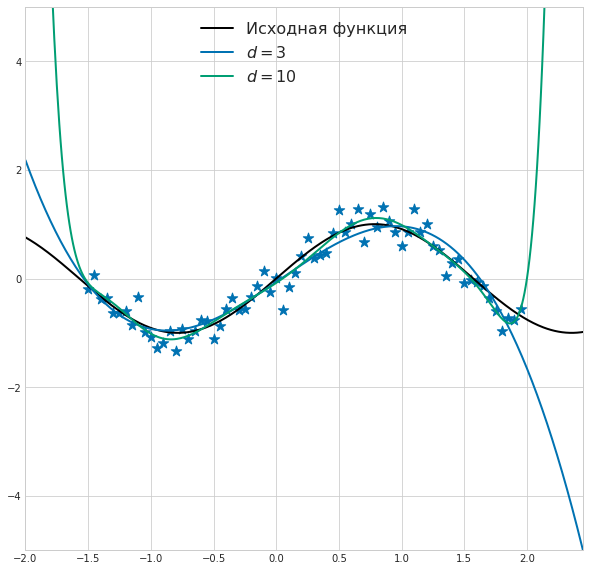

In [4]:
## Исходная функция
orig = lambda x : np.sin(2*x)

## X-координаты точек данных
xd_large = np.arange(-1.5, 2, 0.05)
num_points_l = len(xd_large)

## Данные
data_large = orig(xd_large) + np.random.normal(0, .25, num_points_l)

## Для 
xs = np.arange(xd_large[0]-.5, xd_large[-1]+.5, 0.01)

## Выделение полиномиальных признаков
xs_d = np.vstack([xs ** i for i in range(1, num_points+1)]).transpose()
xd_d_large = np.vstack([xd_large ** i for i in range(1, num_points+1)]).transpose()

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-5, 5))
ax.scatter(xd_large, data_large, marker='*', s=120)
ax.plot(xs, orig(xs), linewidth=2, label="Исходная функция", color="black")

set_of_powers = [ 3, 10 ]

for d in set_of_powers:
    cur_model = linear_model.LinearRegression(fit_intercept=True).fit( xd_d_large[:, :d], data_large )
    ax.plot(xs, cur_model.predict( xs_d[:, :d] ), linewidth=2, label="$d=%d$" % d)

ax.legend(loc="upper center", fontsize=legend_fontsize)

plt.show()

## Регуляризация

[   3.76660667   12.71648479  -26.98223434  -59.6059333   101.93932922
   64.29986831 -114.32609819  -14.16520288   40.81648738   -1.66461242
   -3.5155721 ]
[ 2.10971800e+00  8.23635686e-02 -1.61698085e+00  1.96023259e-01
  2.09125691e-01 -5.68041228e-02  4.09299057e-02 -1.93621361e-02
  6.21461849e-03 -3.65122636e-03  8.48957465e-04]
[ 8.73780121e-01  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -1.28603103e-01 -2.41892825e-02 -1.30044225e-02 -2.54531487e-04
  3.68028258e-03  9.19009558e-04  9.77697997e-04]
[ 0.         -0.          0.         -0.          0.         -0.
  0.         -0.         -0.         -0.00027334 -0.00021683]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


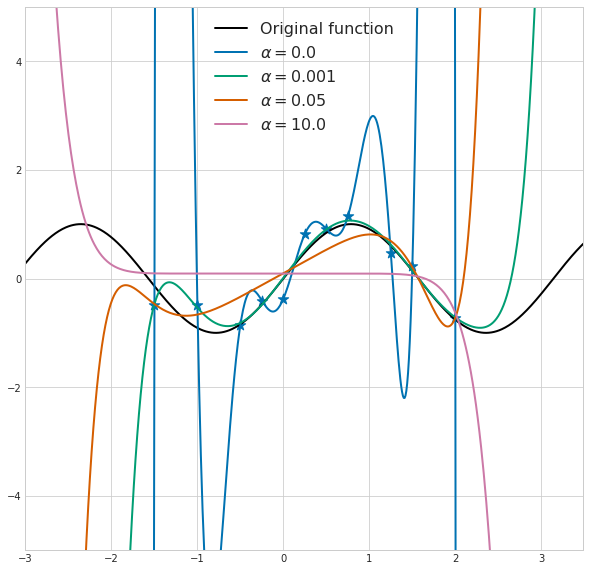

In [15]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-5, 5))
ax.scatter(xd, data, marker='*', s=120)
ax.plot(xs, orig(xs), linewidth=2, label="Original function", color="black")

m_ridge_0 = linear_model.LinearRegression(fit_intercept=True).fit( xd_d[:, :12], data )
ax.plot(xs, m_ridge_0.predict( xs_d[:, :12] ), linewidth=2, label="$\\alpha=0.0$")
print(m_ridge_0.coef_)

m_ridge_1 = linear_model.Lasso(alpha=0.001, fit_intercept=True).fit( xd_d[:, :12], data )
ax.plot(xs, m_ridge_1.predict( xs_d[:, :12] ), linewidth=2, label="$\\alpha=0.001$")
print(m_ridge_1.coef_)

m_ridge_2 = linear_model.Lasso(alpha=0.05, fit_intercept=True).fit( xd_d[:, :12], data )
ax.plot(xs, m_ridge_2.predict( xs_d[:, :12] ), linewidth=2, label="$\\alpha=0.05$")
print(m_ridge_2.coef_)

m_ridge_3 = linear_model.Lasso(alpha=10., fit_intercept=True).fit( xd_d[:, :12], data )
ax.plot(xs, m_ridge_3.predict( xs_d[:, :12] ), linewidth=2, label="$\\alpha=10.0$")
print(m_ridge_3.coef_)

ax.legend(loc="upper center", fontsize=legend_fontsize)
plt.show()

## Усреднение

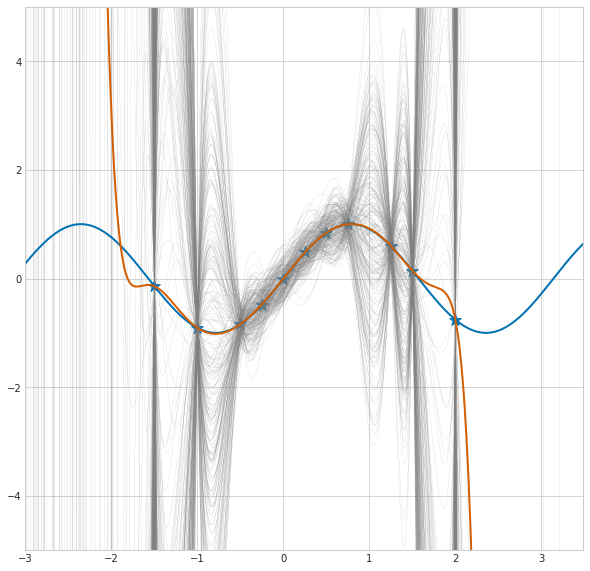

In [25]:
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-5, 5))

res = []
for i in range(50000):
    cur_data = orig(xd) + np.random.normal(0, .25, num_points)
    cur_model = linear_model.Ridge(alpha=0.00, fit_intercept=True).fit( xd_d, cur_data )
    res.append(cur_model.predict( xs_d ))
    if i % 200 == 0:
        ax.plot(xs, res[-1], linewidth=.1, color="0.5")

ax.plot(xs, orig(xs), linewidth=2, label="Original function", color=palette[0])
ax.scatter(xd, orig(xd), marker='*', s=150, color=palette[0])

ax.plot(xs, np.mean( res, axis=0 ), linewidth=2, label="Averaged predictions", color=palette[2])
plt.show()